# Data Analysis: Answer the Key Questions

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

#### Key Question 1) 
#### What are the average, minimum, and maximum heart rate values on a daily basis?

#### 1.1) Calculate **global** values of: *minimum heart rate*, *average heart rate*, *maximum heart rate*. <br>

In this section, we'll calculate:

- The lowest heart rate value ever recorded in the given time range.
- The average heart rate value recorded
- The highest heart rate value ever recorded in the given time range.

First, merge all the datasets about heart rates into one dataset

In [2]:
def merge_daily_datasets(folder_path):
    """
    Merge all the daily datasets into a single dataframe.

    Args:
        folder_path (str): Path to the folder containing all the daily datasets.
    Returns:
        pd.DataFrame: Complete merged Dataset
    """
    all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".csv")]
    dfs = []

    for f in all_files:
        date = os.path.basename(f).replace(".csv", "")
        df = pd.read_csv(f)
        df['date'] = pd.to_datetime(date)
        dfs.append(df)
        
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [3]:
heart_rates_directory = "data/cleaned/heart_rates"

heart_rates_df = merge_daily_datasets(heart_rates_directory)

heart_rates_df.head()

,timestamp,heart_rate,date
0,14:58,69.0,2024-12-21
1,15:00,70.0,2024-12-21
2,15:02,66.0,2024-12-21
3,15:04,71.0,2024-12-21
4,15:06,75.0,2024-12-21


In [4]:
heart_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11790 entries, 0 to 11789
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   11790 non-null  object        
 1   heart_rate  11773 non-null  float64       
 2   date        11790 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 276.5+ KB


In [5]:
def calculate_daily_hr_stats(df):
    """
    Calculates average, minimum and maximum heart rate on a daily basis.
    
    Args:
        complete_df (pd.DataFrame): Complete merged Dataset
    
    Returns:
        dict: Dictionary storing the global values of minimum, average and maximum heart rate.
    """
    stats = {
        "minimum": int(df['heart_rate'].min()),
        "average": int(df['heart_rate'].mean()),
        "maximum": int(df['heart_rate'].max())
    }
    return stats

In [6]:
global_values = calculate_daily_hr_stats(heart_rates_df)

for k, v in global_values.items():
    print(k + ' --> ' + str(v) + ' bpm.')

minimum --> 36 bpm.
average --> 64 bpm.
maximum --> 187 bpm.


#### 1.2) View the minimum, average and maximum heart rate values on a daily basis for the last *n* days.

In [112]:
def plot_hr_values(df, n, show_minimum=True, show_average=True, show_maximum=True):
    """
    Displays, for the last n days, dynamic bars based on the parameters 
    show_minimum, show_average, and show_maximum.

    Args:
        df (pd.DataFrame): DataFrame containing 'date' and 'heart_rate' columns.
        n (int): Number of days to display.
        show_minimum (bool): If True, show bars for the minimum heart rate values.
        show_average (bool): If True, show bars for the average heart rate values.
        show_maximum (bool): If True, show bars for the maximum heart rate values.
    """
    
    grouped = df.groupby('date')['heart_rate'].agg(['min', 'mean', 'max']).reset_index()
    
    grouped = grouped.tail(n)
    
    plt.figure(figsize=(10, 6))
    bar_width = 0.25
    x = range(len(grouped))

    offset = 0

    if show_minimum:
        plt.bar([p + offset * bar_width for p in x], grouped['min'], width=bar_width, label='Min HR', color='#FFE1A8')
        offset += 1
    if show_average:
        plt.bar([p + offset * bar_width for p in x], grouped['mean'], width=bar_width, label='Mean HR', color='#E26D5C')
        offset += 1
    if show_maximum:
        plt.bar([p + offset * bar_width for p in x], grouped['max'], width=bar_width, label='Max HR', color='#472D30')
        offset += 1
    
    plt.xlabel('Date')
    plt.ylabel('Heart Rate')
    plt.title(f'Heart Rate Stats for Last {n} Days')
    plt.xticks([p + (offset - 1) * bar_width / 2 for p in x], grouped['date'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.yticks([i for i in range(0, 220, 10)])
    plt.legend()
    plt.tight_layout()

    plt.show()

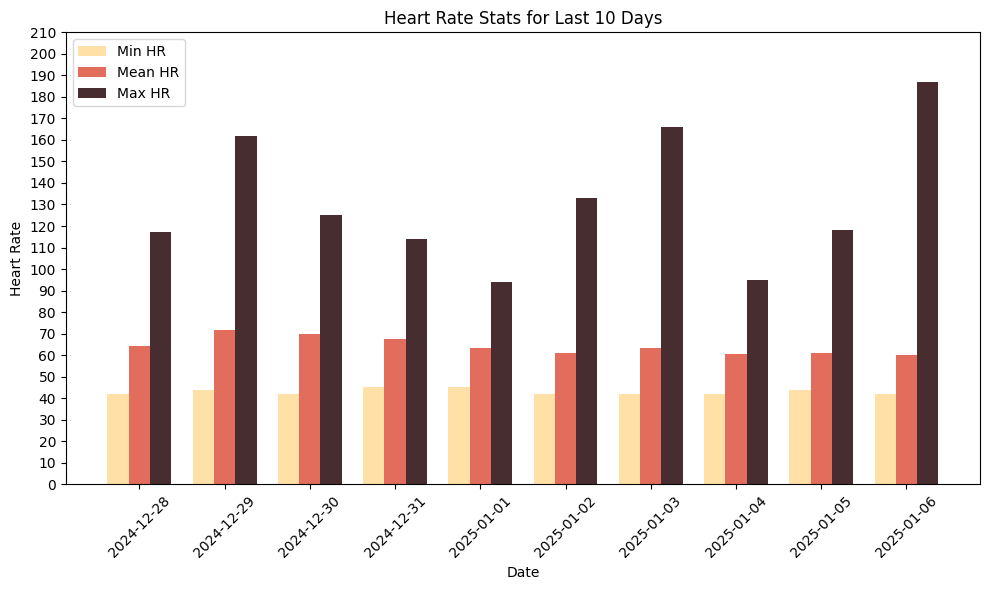

In [8]:
plot_hr_values(heart_rates_df, 10, show_minimum=True, show_average=True, show_maximum=True)

Test

In [9]:
int(heart_rates_df[heart_rates_df['date'] == '2024-12-29']['heart_rate'].mean())

71

#### 1.3) Calculate and display minimum, average and maximum heart rate values on a daily basis based on the month entered as input.

In [10]:
def plot_monthly_hr_stats(df, month, year, reference_lines):
    """
    Displays bar plots for all days of a specific month, showing minimum, average, 
    and maximum heart rate values for each day.

    Args:
        df (pd.DataFrame): DataFrame containing 'date' and 'heart_rate' columns.
        month (int): Month to filter (e.g., 12 for December).
        year (int): Year to filter (e.g., 2024).
        reference_lines (dict): Dictionary of reference lines with keys as labels 
                                and values as the y-values (e.g., {"Resting HR": 60}).
    """
    months = {
        1: 'January',
        2: 'February',
        3: 'March',
        4: 'April',
        5: 'May',
        6: 'June',
        7: 'July',
        8: 'August',
        9: 'September',
        10: 'October',
        11: 'November',
        12: 'December'
    }
    
    monthly_data = df[(df['date'].dt.month == month) & (df['date'].dt.year == year)]

    if monthly_data.empty:
        print(f"No data available for {month}-{year}.")
        return

    grouped = monthly_data.groupby('date')['heart_rate'].agg(['min', 'mean', 'max']).reset_index()

    plt.figure(figsize=(12, 6))
    bar_width = 0.25
    x = range(len(grouped))

    plt.bar(x, grouped['min'], width=bar_width, label='Min HR', color='#a6cee3')
    plt.bar([p + bar_width for p in x], grouped['mean'], width=bar_width, label='Mean HR', color='#1f78b4')
    plt.bar([p + 2 * bar_width for p in x], grouped['max'], width=bar_width, label='Max HR', color='#084594')
    
    if reference_lines:
        for label, y_value in reference_lines.items():
            plt.axhline(y=y_value, color='#4e3bf5', linestyle='--', linewidth=1, label=f'{label} ({y_value} bpm)')
    
    plt.xlabel('Date')
    plt.ylabel('Heart Rate')
    plt.title(f'Daily Heart Rate Metrics: {months[int(month)]} {year}', fontsize=16)
    plt.xticks([p + bar_width for p in x], grouped['date'].dt.strftime('%d'), rotation=45)
    plt.yticks([i for i in range(0, 220, 10)])
    plt.legend()

    plt.show()

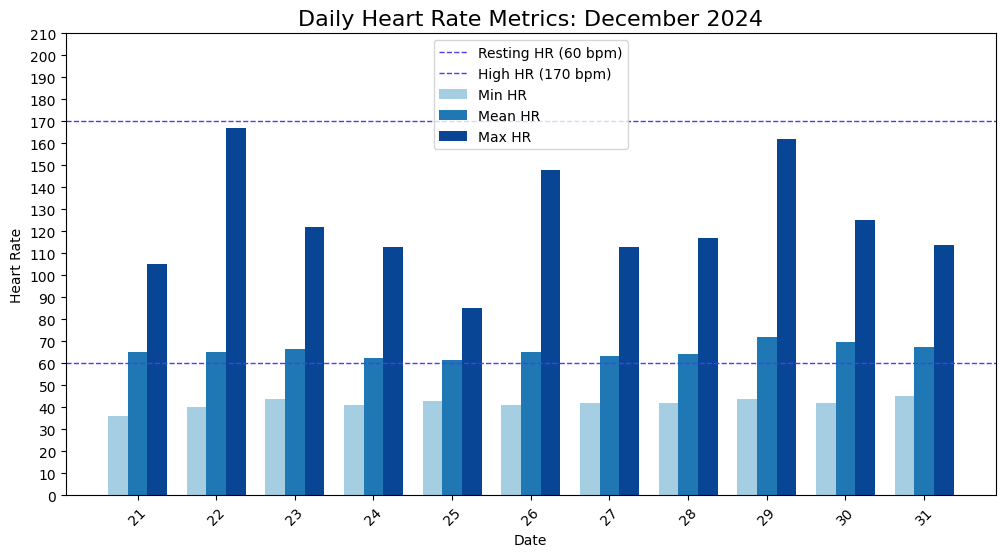

In [11]:
reference_lines = {"Resting HR": 60, "High HR": 170} # fix some values as a reference
plot_monthly_hr_stats(heart_rates_df, 12, 2024, reference_lines=reference_lines)

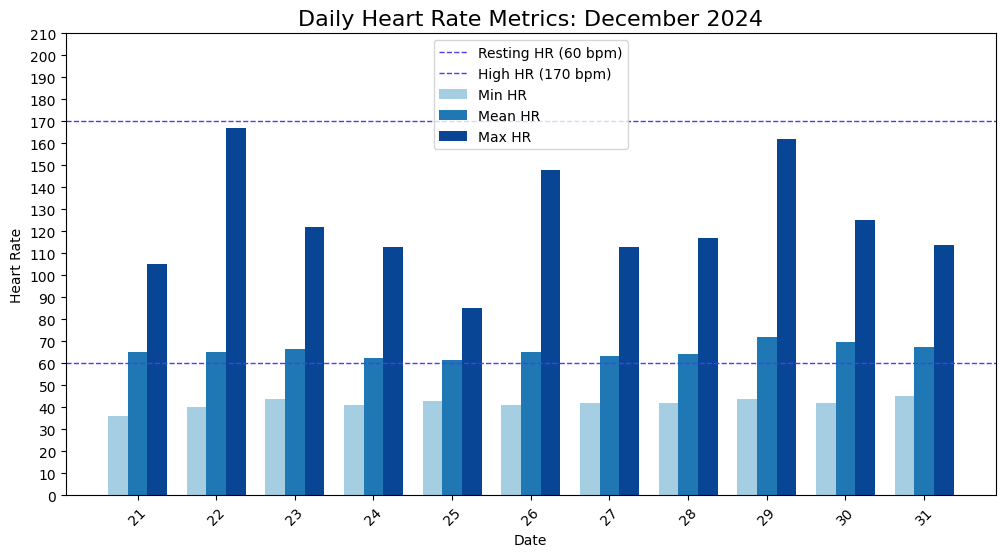

In [12]:
reference_lines = {"Resting HR": 60, "High HR": 170} # fix some values as a reference
plot_monthly_hr_stats(heart_rates_df, 12, 2024, reference_lines=reference_lines)

**Key Insights**: <br>

These graphs represent the daily heart rate metrics (minimum, average and maximum) for the month of December 2024 and January 2025 respectively. <br>
Th dotted lines represent a normal resting heart rate value (60bpm) and a high heart rate value (170bpm) respectively. <br>

- December 2024:
  For the days of December 22nd and December 29th, the graph shows a considerable variation between the average heart rate and the maximum heart rate.
  Conversely, December 25th represents a unique pattern, with a limited difference between the minimum heart rate and the maximum heart rate. This suggests a relaxing day.
  The average heart rate appears to be stable around the 60bpm value. The same for the minimum heart rate, that stabilizes around 40bpm.

- January 2025:
  For the days of January 3rd and January 6th, the graphs shows two significant peaks in maximum heart rate. <br>
  As for the month of December, the values of the minimum heart rate and average heart rate appear to be stable. 
  
The analysis combined with other parameters, such as sleep, could provide further insights to optimize cardiovascular health.

#### 1.4) Calculate the total time spent (in minutes) in heart rate bands above a certain threshold on a daily basis (e.g., 100bpm).

**Note**: The dataset is assumed to have a regular structure. The dataset records values over two-minute time slots and this was verified during the data cleaning phase.

To answer this question, we'll compare two different scenarios:

1) The dataset, as specified above, records values over two minute time slots. Consequently, some values in the `timestamp` column are missing (e.g., 21:35). <br>
Example of first scenario <br>
Threshold = 100 <br>
| Timestamp | Heart Rate |
| --- | --- |
| 21:34 | 103 |
| 21:36 | 80 |
<br>

Fixed the threshold to 100, in the dataset above, we'll count 1 minute spent in heart rate zones above 100bpm (i.e., 21:34). Clearly, this scenario does not consider heart rate values for the missing timestamp (e.g., 21:35). For this reason we'll introduce the 2nd scenario.

2) We'll apply the linear interpolation to hypothesize the data relating to the missing times. <br>
Example of second scenario (Application of Linear Interpolation) <br>
| Timestamp | Heart Rate |
| --- | --- |
| 21:34 | 103 |
| **21:35** | **91.5** |
| 21:36 | 80 |
<br>

By using the linear interpolation, the heart rate value for the time **21:35** is calculated as the average value of the adjacent values.

In this case: <br>
$$
x = \frac{(103 + 80)}{2} = 91.5bpm
$$

References: https://en.wikipedia.org/wiki/Linear_interpolation <br>

Finally, we'll compare the two scenarios.

In [13]:
# without interpolation: 1st scenario
def calculate_time_in_hr_band(df, threshold):
    """
    Calculate the total time (in minutes) spent above a certain heart rate threshold on a daily basis.

    Args:
        df (pd.DataFrame): DataFrame with 'timestamp', 'heart_rate', and 'date' columns.
        threshold (int): Heart rate threshold in bpm.

    Returns:
        pd.DataFrame: DataFrame with daily total minutes above the threshold.
    """
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%H:%M")
    
    df_above_threshold = df[df['heart_rate'] > threshold]

    time_above_threshold = (
        df_above_threshold.groupby('date').size()
    ).reset_index(name='minutes_above_threshold')

    all_dates = pd.DataFrame({'date': df['date'].unique()})
    time_above_threshold = pd.merge(all_dates, time_above_threshold, on='date', how='left')

    time_above_threshold['minutes_above_threshold'] = time_above_threshold['minutes_above_threshold'].fillna(0).astype(int)
    
    return time_above_threshold

In [14]:
def calculate_time_in_hr_band_with_interpolation(df, threshold, test=False):
    """
    Calculate the total time (in minutes) spent above a certain heart rate threshold on a daily basis,
    applying linear interpolation to fill missing timestamps.

    Args:
        df (pd.DataFrame): DataFrame with 'timestamp', 'heart_rate', and 'date' columns.
        threshold (int): Heart rate threshold in bpm.
        test (bool): If True, print interpolated dataframe to verify the process.

    Returns:
        pd.DataFrame: DataFrame with daily total minutes above the threshold.
    """
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%H:%M")

    df = df.set_index(['date', 'timestamp'])

    resampled = df.groupby(level='date').apply(
        lambda group: group.resample('1min', level='timestamp').mean()
    )

    resampled.reset_index(inplace=True)
    
    resampled['heart_rate'] = resampled['heart_rate'].interpolate(method='linear')

    if test:
        print(resampled)

    df_above_threshold = resampled[resampled['heart_rate'] > threshold]
    
    time_above_threshold = (
        df_above_threshold.groupby('date').size()
    ).reset_index(name='minutes_above_threshold')
    
    all_dates = pd.DataFrame({'date': resampled['date'].unique()})
    time_above_threshold = pd.merge(all_dates, time_above_threshold, on='date', how='left')

    time_above_threshold['minutes_above_threshold'] = time_above_threshold['minutes_above_threshold'].fillna(0).astype(int)
    
    return time_above_threshold

In [15]:
df_scenario_1 = calculate_time_in_hr_band(heart_rates_df, 100)
df_scenario_1

,date,minutes_above_threshold
0,2024-12-21,1
1,2024-12-22,17
2,2024-12-23,36
3,2024-12-24,7
4,2024-12-25,0
5,2024-12-26,37
6,2024-12-27,19
7,2024-12-28,2
8,2024-12-29,53
9,2024-12-30,34


In [16]:
df_scenario_2 = calculate_time_in_hr_band_with_interpolation(heart_rates_df, 100)
df_scenario_2

,date,minutes_above_threshold
0,2024-12-21,1
1,2024-12-22,36
2,2024-12-23,68
3,2024-12-24,15
4,2024-12-25,0
5,2024-12-26,74
6,2024-12-27,35
7,2024-12-28,4
8,2024-12-29,108
9,2024-12-30,68


**Test**: Test the function that applies the linear interpolation.

In [17]:
test_data = {
    'timestamp': ['21:30', '21:32', '21:35', '21:37', '21:40', '21:42', '21:44', '21:46', '21:48', '21:50'],
    'heart_rate': [80, 85, 100, 95, 100, 103, 96, 93, 98, 110],
    'date': ['2024-12-26'] * 10
}

test_df = pd.DataFrame(test_data)
test_df['date'] = pd.to_datetime(test_df['date'], format="%Y-%m-%d")

test_df

,timestamp,heart_rate,date
0,21:30,80,2024-12-26
1,21:32,85,2024-12-26
2,21:35,100,2024-12-26
3,21:37,95,2024-12-26
4,21:40,100,2024-12-26
5,21:42,103,2024-12-26
6,21:44,96,2024-12-26
7,21:46,93,2024-12-26
8,21:48,98,2024-12-26
9,21:50,110,2024-12-26


In [18]:
test_output = calculate_time_in_hr_band_with_interpolation(test_df, 99, test=True)
test_output

         date           timestamp  heart_rate
0  2024-12-26 1900-01-01 21:30:00   80.000000
1  2024-12-26 1900-01-01 21:31:00   82.500000
2  2024-12-26 1900-01-01 21:32:00   85.000000
3  2024-12-26 1900-01-01 21:33:00   90.000000
4  2024-12-26 1900-01-01 21:34:00   95.000000
5  2024-12-26 1900-01-01 21:35:00  100.000000
6  2024-12-26 1900-01-01 21:36:00   97.500000
7  2024-12-26 1900-01-01 21:37:00   95.000000
8  2024-12-26 1900-01-01 21:38:00   96.666667
9  2024-12-26 1900-01-01 21:39:00   98.333333
10 2024-12-26 1900-01-01 21:40:00  100.000000
11 2024-12-26 1900-01-01 21:41:00  101.500000
12 2024-12-26 1900-01-01 21:42:00  103.000000
13 2024-12-26 1900-01-01 21:43:00   99.500000
14 2024-12-26 1900-01-01 21:44:00   96.000000
15 2024-12-26 1900-01-01 21:45:00   94.500000
16 2024-12-26 1900-01-01 21:46:00   93.000000
17 2024-12-26 1900-01-01 21:47:00   95.500000
18 2024-12-26 1900-01-01 21:48:00   98.000000
19 2024-12-26 1900-01-01 21:49:00  104.000000
20 2024-12-26 1900-01-01 21:50:00 

,date,minutes_above_threshold
0,2024-12-26,7


The function works correctly.

Visualize the two scenarios:

In [74]:
def plot_hr_threshold_comparison(df, threshold):
    """
    Plots a comparison of the time spent above a given heart rate threshold
    in two scenarios: with and without interpolation, and highlights the average scenario.

    Args:
        df (pd.DataFrame): Original DataFrame with 'timestamp', 'heart_rate', and 'date' columns.
        threshold (int): Heart rate threshold in bpm.
    """
    df_scenario_1 = calculate_time_in_hr_band(df, threshold)
    
    df_scenario_2 = calculate_time_in_hr_band_with_interpolation(df, threshold)
    
    # Average Scenario Calculation
    df_average = pd.merge(
        df_scenario_1,
        df_scenario_2,
        on='date',
        suffixes=('_no_interp', '_with_interp')
    )
    df_average['minutes_above_threshold_avg'] = (
        (df_average['minutes_above_threshold_no_interp'] + df_average['minutes_above_threshold_with_interp']) / 2
    )
    
    plt.figure(figsize=(14, 6))
    
    # Scenario 1: Without Interpolation
    plt.plot(
        df_scenario_1['date'], df_scenario_1['minutes_above_threshold'], 
        label='Without Interpolation', color='#a6cee3', marker='o'
    )
    
    # Scenario 2: With Interpolation
    plt.plot(
        df_scenario_2['date'], df_scenario_2['minutes_above_threshold'], 
        label='With Interpolation', color='#1f78b4', marker='o'
    )
    
    # Average Scenario
    plt.plot(
        df_average['date'], df_average['minutes_above_threshold_avg'], 
        label='Average Scenario', color='#084594', linestyle='--', linewidth=2, marker='s'
    )
    
    # Graph details
    plt.title(f'Time Above {threshold} bpm: Comparison of Scenarios', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Minutes Above Threshold', fontsize=12)
    plt.xticks(df_scenario_1['date'], rotation=45)
    plt.yticks([i for i in range(0, threshold + 20, 5)])
    plt.legend(fontsize=10)
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.show()

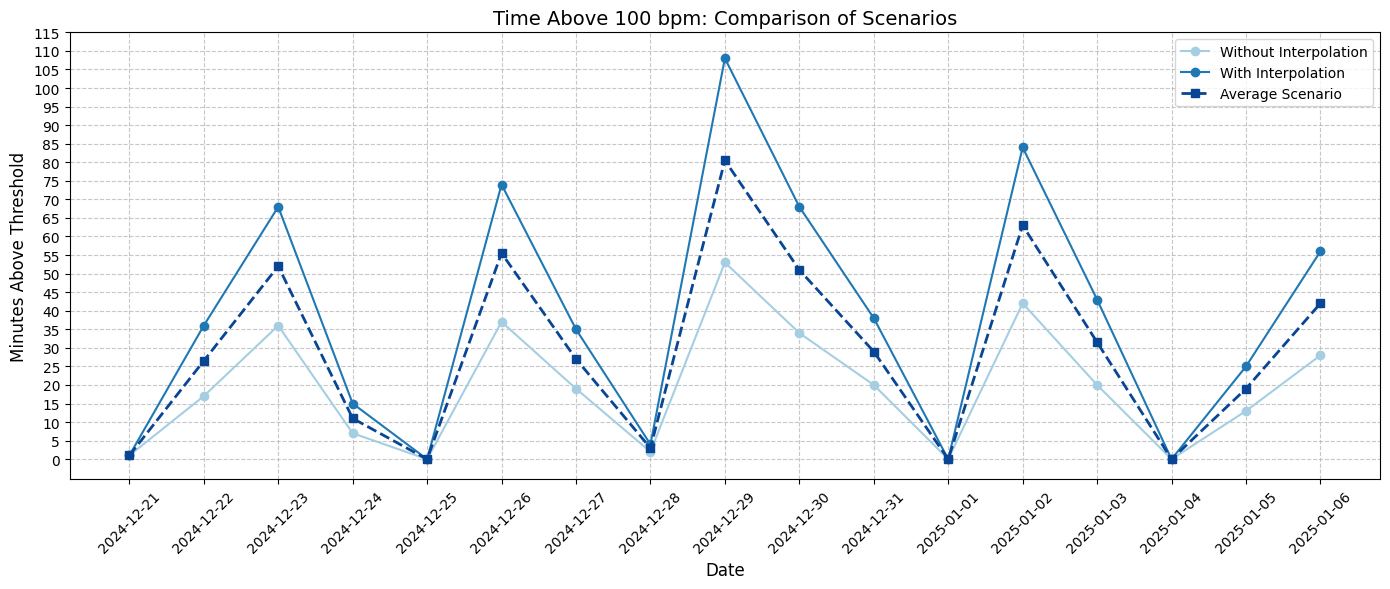

In [20]:
plot_hr_threshold_comparison(heart_rates_df, threshold=100)

#### Key Question 2) 
#### How does heart rate differ during sleep compared to waking hours?

**Section Overview**: In this section, we analyze how heart rate changes during sleep compared to waking hours. Using timestamps, we classify data into "sleep" and "awake" periods, calculate key metrics and visualize the differences to uncover patterns and insights.

#### 2.1) This section investigates daily heart rate differences during sleep and the afternoon-evening period (12 PM - 10 PM). By analyzing mean heart rate values, we aim to identify trends or patterns that distinguish these periods.

In [23]:
# create dates range
start_date = '2024-12-21'
end_date = '2025-01-05'

# 2025-01-06 is excluded since we don't have sleep data for that day
date_list = pd.date_range(start=start_date, end=end_date).strftime("%Y-%m-%d").tolist()

print(date_list)

['2024-12-21', '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30', '2024-12-31', '2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04', '2025-01-05']


In [34]:
def calculate_daily_hr_averages(date_list):
    """
    Calculate the average heart rate for daytime (12:00 PM - 10:00 PM) and nighttime (during sleep)
    for each date in the provided date list.

    Args:
        date_list (list): List of dates in the format 'YYYY-MM-DD'.

    Returns:
        dict: A dictionary where each key is a date and the value is another dictionary
              with 'daytime_avg' and 'nighttime_avg' heart rates.
    """
    # Folders
    sleep_data_folder = "data/cleaned/sleep"  
    hr_data_folder = "data/cleaned/heart_rates"       

    # Output Dict
    daily_averages = {}

    for date in date_list:
        # Load data about heart rates
        hr_file = os.path.join(hr_data_folder, f"{date}.csv")
        if not os.path.exists(hr_file):
            print(f"Heart rate data for {date} not found. Skipping...")
            continue
        hr_data = pd.read_csv(hr_file)

        # Filter data about heart rate for the time range 12:00 A.M. - 10:00 P.M.
        hr_data['timestamp'] = pd.to_datetime(hr_data['timestamp'], format="%H:%M")
        daytime_data = hr_data[(hr_data['timestamp'].dt.time >= pd.to_datetime("12:00").time()) & 
                               (hr_data['timestamp'].dt.time <= pd.to_datetime("22:00").time())]

        # Average day heart rate
        daytime_avg = float(daytime_data['heart_rate'].mean())

        # Find the next date for sleep data
        next_date = (pd.to_datetime(date) + pd.Timedelta(days=1)).strftime('%Y-%m-%d')

        # Load Data about sleep
        sleep_file = os.path.join(sleep_data_folder, f"{next_date}.csv")
        if not os.path.exists(sleep_file):
            print(f"Sleep data for {next_date} not found. Skipping...")
            continue
        sleep_data = pd.read_csv(sleep_file)

        # Calculate average nighttime heart rate
        nighttime_avg = float(sleep_data['heart_rate'].mean())

        # Save the results in the output dictionary
        daily_averages[date] = {
            'daytime_avg': round(daytime_avg, 2),
            'nighttime_avg': round(nighttime_avg, 2)
        }

    return daily_averages

In [35]:
awake_and_sleep_hr_values = calculate_daily_hr_averages(date_list)
print(awake_and_sleep_hr_values)

Sleep data for 2025-01-01 not found. Skipping...
{'2024-12-21': {'daytime_avg': 65.08, 'nighttime_avg': 51.44}, '2024-12-22': {'daytime_avg': 73.64, 'nighttime_avg': 49.84}, '2024-12-23': {'daytime_avg': 69.5, 'nighttime_avg': 47.1}, '2024-12-24': {'daytime_avg': 66.79, 'nighttime_avg': 51.9}, '2024-12-25': {'daytime_avg': 62.99, 'nighttime_avg': 45.76}, '2024-12-26': {'daytime_avg': 75.2, 'nighttime_avg': 48.06}, '2024-12-27': {'daytime_avg': 72.88, 'nighttime_avg': 48.16}, '2024-12-28': {'daytime_avg': 73.25, 'nighttime_avg': 51.95}, '2024-12-29': {'daytime_avg': 79.82, 'nighttime_avg': 52.66}, '2024-12-30': {'daytime_avg': 72.33, 'nighttime_avg': 50.24}, '2025-01-01': {'daytime_avg': 61.27, 'nighttime_avg': 49.54}, '2025-01-02': {'daytime_avg': 71.1, 'nighttime_avg': 48.86}, '2025-01-03': {'daytime_avg': 71.8, 'nighttime_avg': 48.54}, '2025-01-04': {'daytime_avg': 68.86, 'nighttime_avg': 49.14}, '2025-01-05': {'daytime_avg': 68.7, 'nighttime_avg': 49.31}}


**Visualize the results**

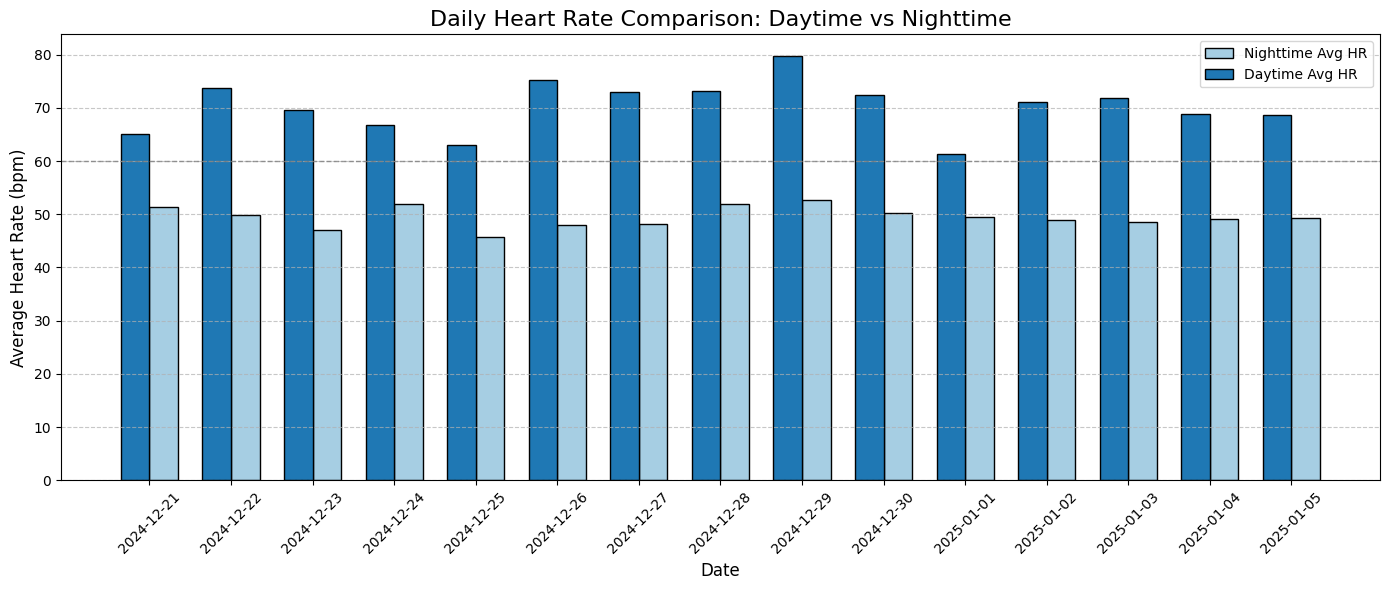

In [49]:
dates = list(awake_and_sleep_hr_values.keys())
daytime_avg = [awake_and_sleep_hr_values[date]['daytime_avg'] for date in dates]
nighttime_avg = [awake_and_sleep_hr_values[date]['nighttime_avg'] for date in dates]

x = np.arange(len(dates))
bar_width = 0.35

plt.figure(figsize=(14, 6))

plt.bar(x + bar_width / 2, nighttime_avg, bar_width, label='Nighttime Avg HR', color='#a6cee3', edgecolor='black')
plt.bar(x - bar_width / 2, daytime_avg, bar_width, label='Daytime Avg HR', color='#1f78b4', edgecolor='black')

plt.title('Daily Heart Rate Comparison: Daytime vs Nighttime', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Heart Rate (bpm)', fontsize=12)
plt.xticks(x, dates, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.axhline(y=60, color='gray', linestyle='--', linewidth=1, alpha=0.8, label='Normal Resting HR')

plt.show()

**What does the graph above tell us?**

The graph provides a detailed comparison of average heart rates during two distinct periods: daytime (12:00 A.M. - 10:00 P.M.) and nighttime (sleep time). The data spans from December 21, 2024, to January 5, 2025, offering insights into daily variations in heart rate patterns. <br>

**General Trend**: Across all days, the `nighttime average heart rate` is consistently lower than the `daytime average heart rate`. <br>

**Nighttime Heart Rate**: The nighttime average heart rate fluctuates between **45bpm** and **53bpm**. The highest nighttime heart rate is observed on December 29, 2024, reaching **52.66bpm**. The lowest nighttime heart rate occurs on December 25, 2024, reaching **45.76bpm**. This is a result that we could have expected, since Christmas Day is usually a relaxing day.<br>

**Daytime Heart Rate**: The average daytime heart rate fluctuates between **60bpm** and **80bpm**. The highest daytime heart rate is observed on December 29, 2024, reaching **79.8bpm** (in line with the results cited above, since that aligns with the peak nighttime heart rate on the same day). The lowest daytime average heart rate is observed on January 1, 2025 (in line with the expected results given that New Year's Day was a day of complete relaxation), reaching **61.27bpm**. <br>

**Consistency**: The difference between nighttime and daytime heart rates remains relatively consistent. <br>

Peaks in heart rate on specific days (e.g., December 29) may correlate with lifestyyle factors such as physical activity or dietary habits.

#### 2.2) Calculate the average heart rate for deep sleep, REM sleep, and light sleep.

**Section Overview**: This section focuses on analyzing heart rate patterns across different sleep stages (REM, deep, and light sleep). By calculating and visualizing average heart rate values and variability for each stage, we aim to uncover nightly trends and significant differences between sleep stages.

In [114]:
def calculate_sleep_phase_hr():
    """
    Reads all sleep data files from a specified folder, calculates average heart rates for 
    different sleep phases (deep, light, REM) for each day, and returns a dictionary.

    Returns:
        dict: A nested dictionary where:
              - Keys are the dates (e.g., '2024-12-22').
              - Values are dictionaries with average heart rates for each sleep phase:
                {'deep': avg_hr, 'light': avg_hr, 'rem': avg_hr}.
    """
    # Folder containing sleep data
    sleep_data_folder = "data/cleaned/sleep" 

    # Output Dict
    sleep_hr_dict = {}

    # Read all files
    for filename in os.listdir(sleep_data_folder):
        if filename.endswith(".csv"): 
            date = filename.replace('.csv', '')

            file_path = os.path.join(sleep_data_folder, filename)
            df = pd.read_csv(file_path)

            grouped = df.groupby('sleep_stage')['heart_rate'].mean()

            deep_hr = round(float(grouped.get('Deep', None)), 2) # Deep Sleep
            light_hr = round(float(grouped.get('Light', None)), 2)  # Light Sleep
            rem_hr = round(float(grouped.get('REM', None)), 2)  # REM Sleep

            sleep_hr_dict[date] = {
                'deep': deep_hr,
                'light': light_hr,
                'rem': rem_hr
            }

    return sleep_hr_dict

In [56]:
sleep_hr_data = calculate_sleep_phase_hr()
print(sleep_hr_data)

{'2024-12-22': {'deep': 54.81, 'light': 50.59, 'rem': 49.24}, '2024-12-23': {'deep': 52.74, 'light': 49.04, 'rem': 50.31}, '2024-12-24': {'deep': 48.22, 'light': 46.76, 'rem': 46.82}, '2024-12-25': {'deep': 51.93, 'light': 51.34, 'rem': 53.08}, '2024-12-26': {'deep': 45.1, 'light': 44.96, 'rem': 47.37}, '2024-12-27': {'deep': 49.37, 'light': 47.72, 'rem': 47.41}, '2024-12-28': {'deep': 52.06, 'light': 47.12, 'rem': 48.09}, '2024-12-29': {'deep': 56.3, 'light': 50.47, 'rem': 47.86}, '2024-12-30': {'deep': 55.18, 'light': 52.16, 'rem': 50.66}, '2024-12-31': {'deep': 51.7, 'light': 49.65, 'rem': 49.0}, '2025-01-02': {'deep': 51.64, 'light': 48.83, 'rem': 49.69}, '2025-01-03': {'deep': 51.32, 'light': 48.69, 'rem': 46.2}, '2025-01-04': {'deep': 49.79, 'light': 47.95, 'rem': 47.95}, '2025-01-05': {'deep': 47.98, 'light': 49.24, 'rem': 49.44}, '2025-01-06': {'deep': 50.32, 'light': 48.43, 'rem': 49.85}}


In [78]:
sleep_hr_df = pd.DataFrame(sleep_hr_data).T # Transposed dataframe
sleep_hr_df.index = pd.to_datetime(sleep_hr_df.index)
sleep_hr_df

,deep,light,rem
2024-12-22,54.81,50.59,49.24
2024-12-23,52.74,49.04,50.31
2024-12-24,48.22,46.76,46.82
2024-12-25,51.93,51.34,53.08
2024-12-26,45.10,44.96,47.37
2024-12-27,49.37,47.72,47.41
2024-12-28,52.06,47.12,48.09
2024-12-29,56.30,50.47,47.86
2024-12-30,55.18,52.16,50.66
2024-12-31,51.70,49.65,49.00


In [79]:
def plot_sleep_stage_hr(df):
    """
    Plot average heart rate by sleep stage over time by using trend lines.
    """
    plt.figure(figsize=(12, 4))

    plt.plot(df.index, df['deep'], color='#a6cee3', label='Deep Sleep', marker='o')
    plt.plot(df.index, df['light'], color='#1f78b4', label='Light Sleep', marker='o')
    plt.plot(df.index, df['rem'], color='#084594', label='REM Sleep', marker='o')

    plt.title('Average Heart Rate by Sleep Stage Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Heart Rate (bpm)', fontsize=12)
    plt.legend(title='Sleep Stage', fontsize=10)
    plt.grid(True, alpha=0.7)

    plt.xticks([date for date in df.index], rotation=45)

    plt.tight_layout()
    plt.show()

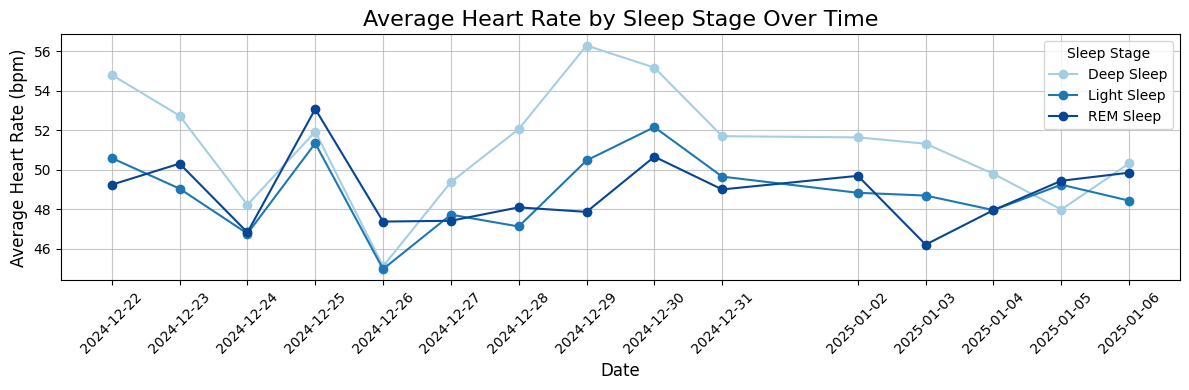

In [80]:
plot_sleep_stage_hr(sleep_hr_df)

The graph above shows the average heart rate for three sleep stages (Deep, Light and REM) over the target period. <br>
Each sleep stage is represented by a separate line, allowing for comparison across dates. <br>

**Deep Sleep**: shows the highest variability between its lowest value and its highest value. Overall, it appears to be the sleep phase with the highest average heart rate. <br>

However, this graph could be enhanced with better design choices.

In [105]:
def bar_plot_sleep_stage_hr(df):
    """
    Plot average heart rate by sleep stage over time by using a bar chart.
    """
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(15, 8))

    x = np.arange(len(df.index))
    width = 0.25

    plt.bar(x - width, df['deep'], width, label='Deep Sleep', color='#a6cee3', alpha=0.8)
    plt.bar(x, df['light'], width, label='Light Sleep', color='#1f78b4', alpha=0.8)
    plt.bar(x + width, df['rem'], width, label='REM Sleep', color='#084594', alpha=0.8)

    plt.title('Heart Rate Distribution Across Sleep Stages', fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Heart Rate (BPM)', fontsize=12)

    plt.xticks(x, [d.strftime('%Y-%m-%d') for d in df.index], rotation=90, ha='right')
    plt.yticks([i for i in range(0, 65, 5)])

    plt.legend(title='Sleep Stage', bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

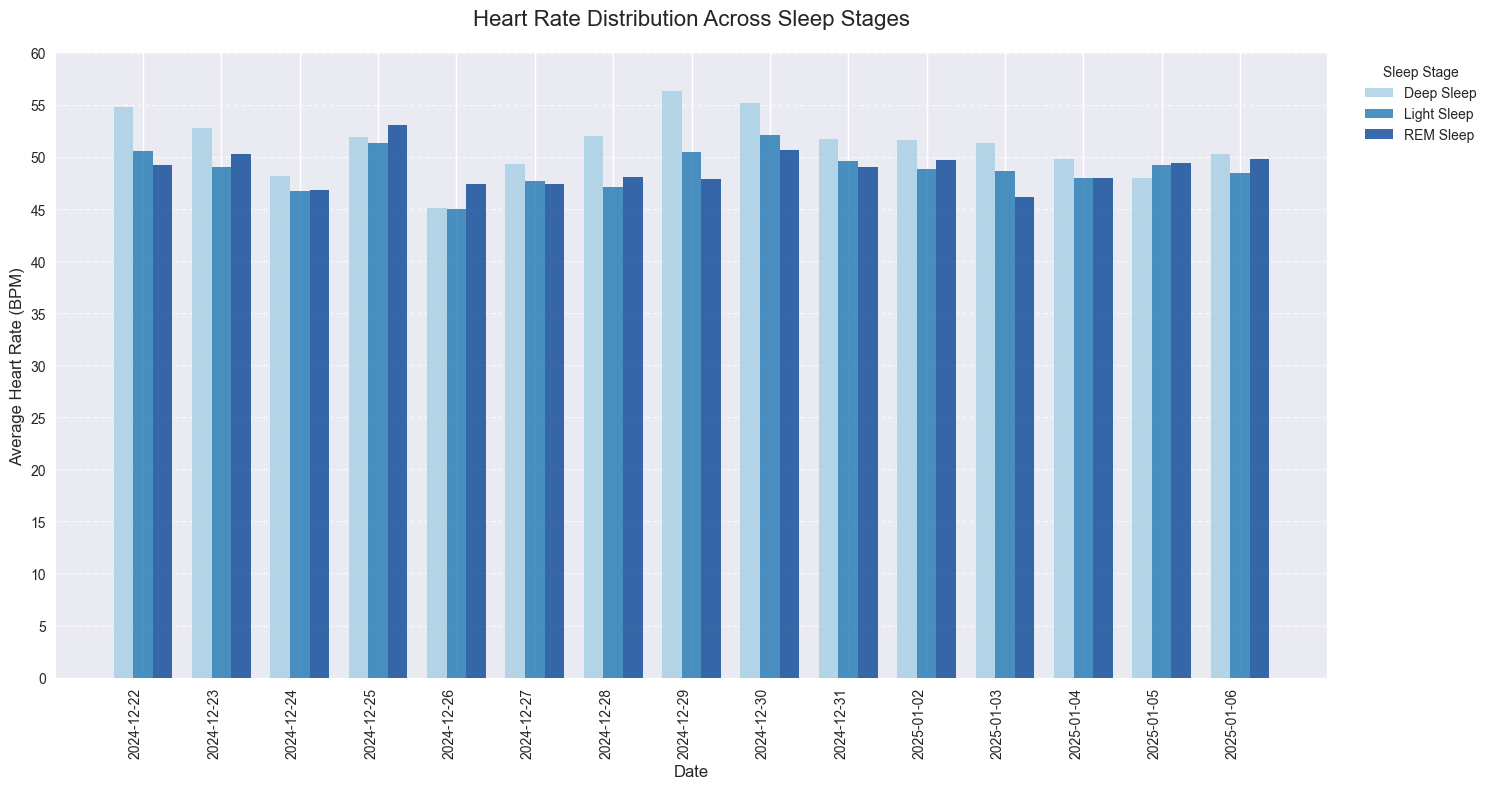

In [106]:
bar_plot_sleep_stage_hr(sleep_hr_df)

The bar chart above confirms even better the results obtained previously. For the most days, the deep sleep stage is the stage with the highest average heart rate. <br>
It is important to understand whether this result is strongly influenced by any outliers. <br>
However, looking at the data for a sample day (e.g., December 29th), the heart rate recorded during deep sleep appears to be very consistent.

In [107]:
# filter only deep sleep data for each day
def filter_sleep_data():
    """
    Reads all sleep data files from the specified folder, filters rows where `sleep_stage` is "Deep",
    and combines them into a single dataframe with an added `date` column.

    Returns:
        pd.DataFrame: A dataframe containing only rows with `sleep_stage` equal to "Deep",
                      with an additional `date` column.
    """
    # Folder containing sleep data
    sleep_data_folder = "data/cleaned/sleep" 

    filtered_dataframes = []
    for filename in os.listdir(sleep_data_folder):
        if filename.endswith(".csv"):
            date = filename.replace('.csv', '')
            
            file_path = os.path.join(sleep_data_folder, filename)
            df = pd.read_csv(file_path)

            filtered_df = df[df['sleep_stage'] == "Deep"].copy()
            
            filtered_df['date'] = date

            filtered_dataframes.append(filtered_df)

    combined_df = pd.concat(filtered_dataframes, ignore_index=True)

    return combined_df

In [109]:
combined_filtered_sleep_df = filter_sleep_data()
combined_filtered_sleep_df.head()

,heart_rate,timestamp,sleep_stage,date
0,57,02:12:00,Deep,2024-12-22
1,59,02:14:00,Deep,2024-12-22
2,59,02:16:00,Deep,2024-12-22
3,59,02:18:00,Deep,2024-12-22
4,59,02:20:00,Deep,2024-12-22


In [110]:
combined_filtered_sleep_df['sleep_stage'].unique()

array(['Deep'], dtype=object)

In [123]:
def plot_deep_sleep_heart_rate_distribution(df):
    """
    Plots a boxplot to visualize the distribution of heart rate during deep sleep
    for each day in the provided dataframe.

    Args:
        df (pd.DataFrame): DataFrame containing deep sleep data. It must include the following columns:
                           - 'date': The date corresponding to the sleep data.
                           - 'heart_rate': The heart rate values to be visualized.

    Returns:
        None: The function generates and displays the boxplot.
    """
    plt.figure(figsize=(14, 6))

    sns.boxplot(x='date', y='heart_rate', data=df, hue='date', palette='Blues', dodge=False, legend=False)

    plt.title('Heart Rate Distribution During Deep Sleep (Per Day)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Heart Rate (BPM)', fontsize=12)

    plt.xticks(rotation=45)
    plt.yticks([i for i in range(40, 80, 2)])

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()

    plt.show()

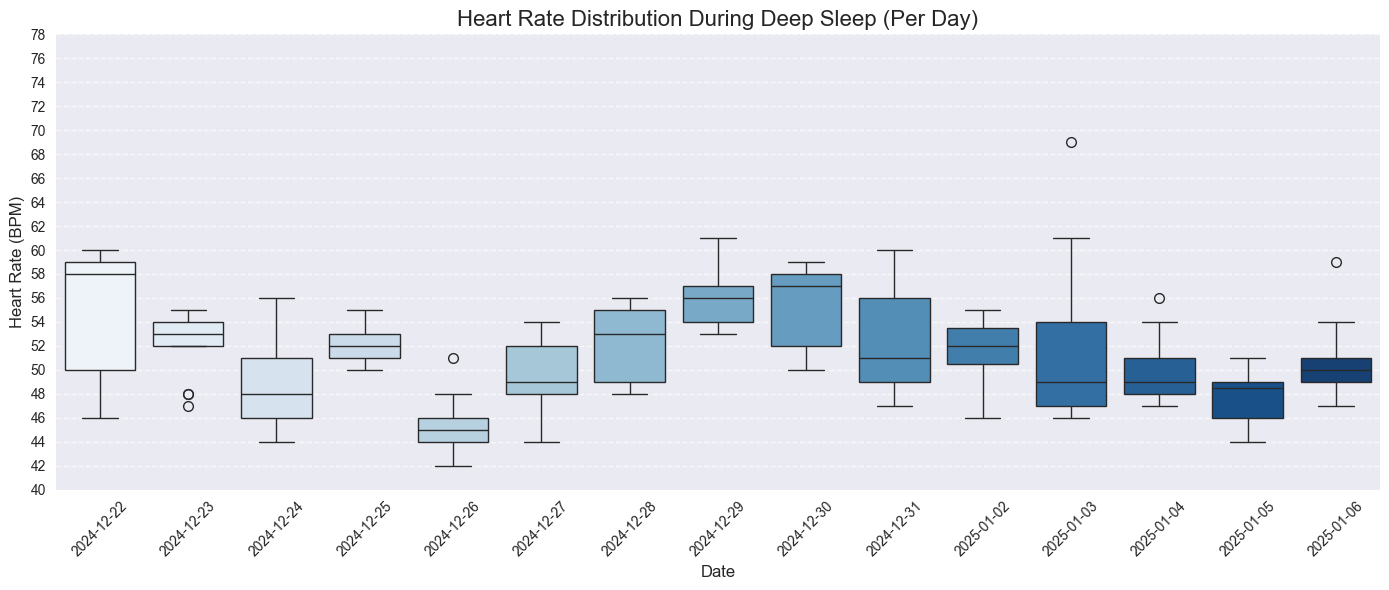

In [124]:
plot_deep_sleep_heart_rate_distribution(combined_filtered_sleep_df)

The analysis of heart rate distribution during deep sleep across the 15-day period reveals a surprising observation: outliers are minimal and do not appear to significantly influence the calculated average heart rate. This suggests that the higher average heart rate in the deep sleep phase is not an artifact caused by sporadic extreme values. <br>

Instead, the boxplots highlight a stable and consistent range of heart rate values during deep sleep, with medians that are relatively higher compared to expectations for this sleep stage. The tight interquartile ranges and limited presence of outliers across all days emphasize that the elevated average heart rate is likely a true characteristic of the deep sleep phase, rather than a result of data anomalies or errors.